# 일반 심전도 신호 분석

심박동과 심박동사이의 간격은 안정을 취하고 있을 때에도 항상 변화하는데 이를 심박동수 변이(heart rate
variability)

bpm : 심박수

In [1]:
#import packages
import heartpy as hp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

global result_df
result_df = None

global data
global fs
fs = 500.0 #example file 0 is sampled at 100.0 Hz
global filtered

# Filler처리할 데이터를 확인하기 위해 그래프 적용

In [9]:
def graph(index, prototype):
    file = "./ECG/S"+index+"/S"+index+"_ECG_"+prototype+".csv"
    file_ =pd.read_csv(file)
    global data
    data = file_["Num1"]
    plt.figure(figsize=(12,4))
    plt.plot(data)
    plt.show()

    #and zoom in a bit
    plt.figure(figsize=(12,4))
    plt.plot(data[0:2500])
    plt.show()

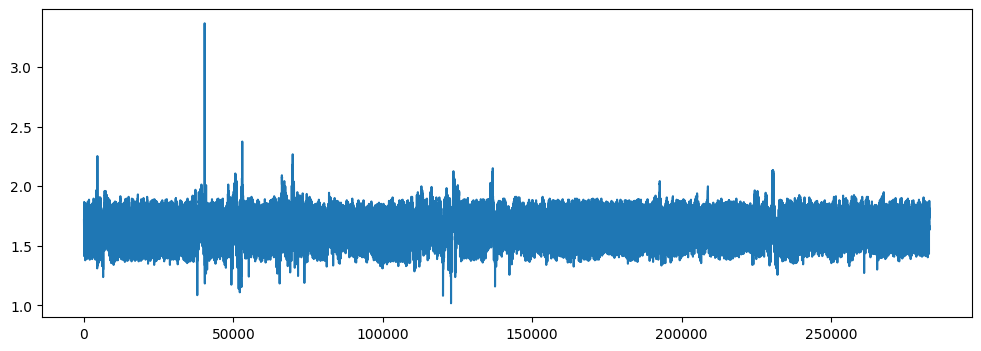

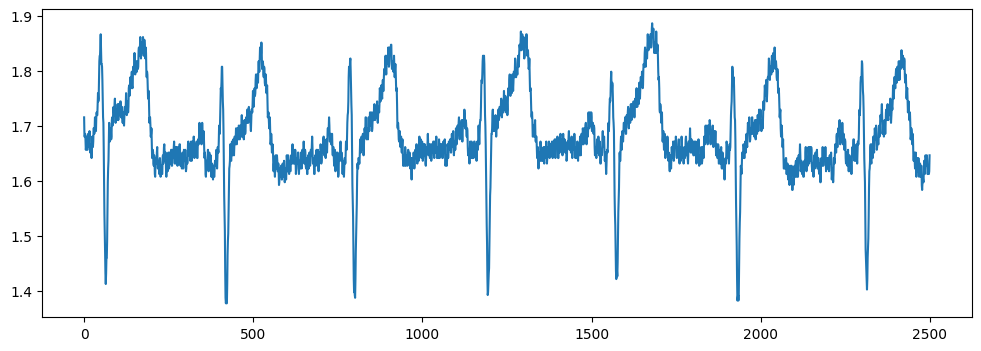

In [10]:
graph("3","base")




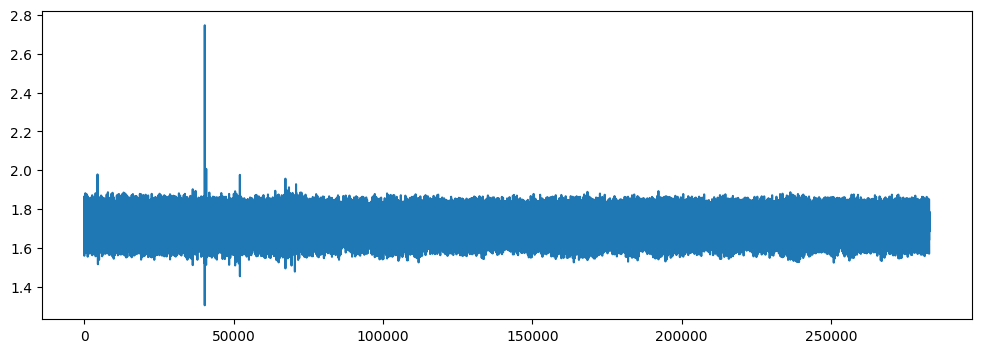

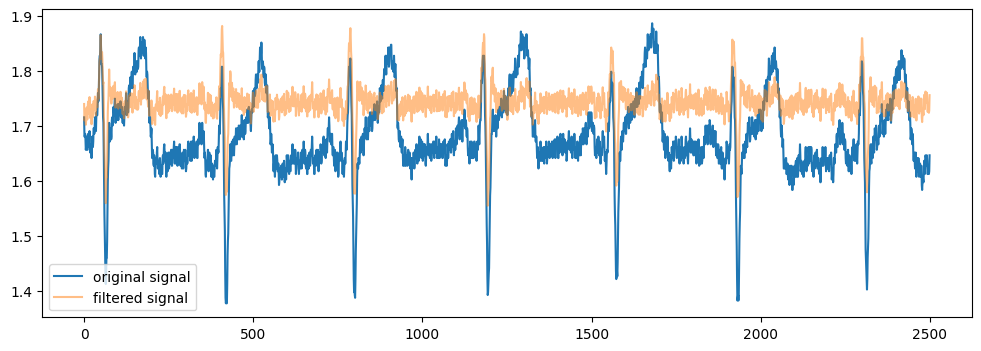

In [11]:
global filtered

filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

bpm: 87.352104
ibi: 686.875274
sdnn: 85.639848
sdsd: 47.876264
rmssd: 63.968248
pnn20: 0.658228
pnn50: 0.291139
hr_mad: 48.000000
sd1: 45.217528
sd2: 99.900551
s: 14191.377998
sd1/sd2: 0.452625
breathingrate: 0.223001
vlf: 3547.030675
lf: 1039.528359
hf: 1513.476488
lf/hf: 0.686848
p_total: 6100.035523
vlf_perc: 58.147705
lf_perc: 17.041349
hf_perc: 24.810945
lf_nu: 40.717837
hf_nu: 59.282163


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1200x400 with 0 Axes>

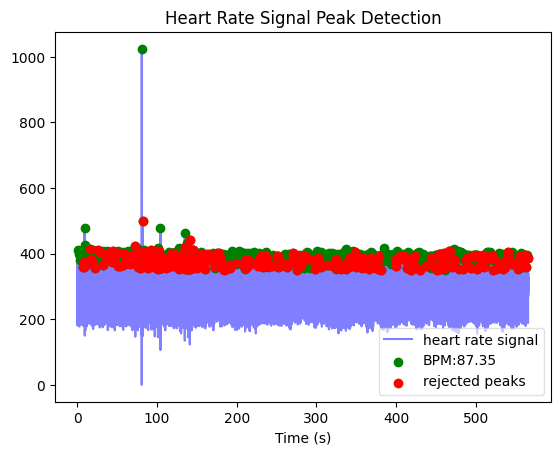

In [12]:
#run analysis
wd, m = hp.process(hp.scale_data(filtered), fs,calc_freq=True)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

bpm: 90.420156
ibi: 663.568862
sdnn: 91.037038
sdsd: 47.923940
rmssd: 64.561814
pnn20: 0.666667
pnn50: 0.277778
hr_mad: 50.000000
sd1: 45.555650
sd2: 94.633242
s: 13543.653553
sd1/sd2: 0.481392
breathingrate: 0.000000
vlf: 4073.884223
lf: 546.661969
hf: 1413.280298
lf/hf: 0.386804
p_total: 6033.826490
vlf_perc: 67.517424
lf_perc: 9.059955
hf_perc: 23.422621
lf_nu: 27.891738
hf_nu: 72.108262


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


<Figure size 1200x400 with 0 Axes>

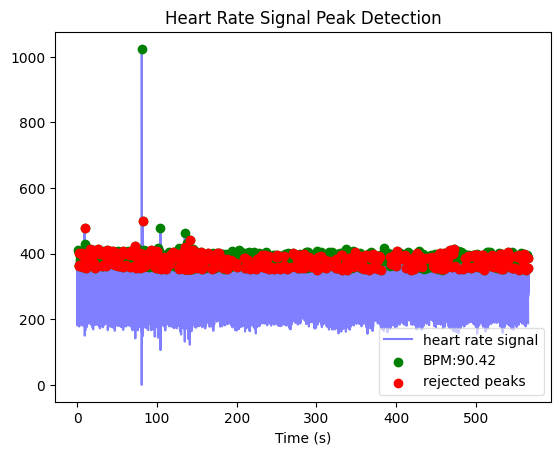

In [13]:
from scipy.signal import resample

#resample the data. Usually 2, 4, or 6 times is enough depending on original sampling rate
resampled_data = resample(filtered, len(filtered) * 2)

#And run the analysis again. Don't forget to up the sample rate as well!
wd, m = hp.process(hp.scale_data(resampled_data), fs * 2,calc_freq=True)




# wd, m = hp.process(hp.scale_data(filtered), fs,calc_freq=True)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [ ]:
global filtered

filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')

#visualize again
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#and zoom in a bit
plt.figure(figsize=(12,4))
plt.plot(data[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()

---
분석 진행

In [2]:
def analysis(index,prototype):
    global result_df

    file = "./ECG/S"+index+"/S"+index+"_ECG_"+prototype+".csv"
    file_ =pd.read_csv(file)
    data = file_["Num1"]
    
    # data_filtering = hp.filter_signal(data,cutoff = [0.75, 3.5], sample_rate = fs,order = 3, filtertype='bandpass')
    # data_filtering =   hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')
    filtered = hp.filter_signal(data, cutoff = 0.05, sample_rate = fs, filtertype='notch')
    working_data, measures = hp.process(hp.scale_data(filtered), fs, calc_freq=True)
   
    
    working_data, measures = hp.process(data.values, fs, calc_freq=True)
    bpm = measures['bpm']
    rmssd = measures['rmssd']
    lf_hf = measures['lf/hf']
    sdnn = measures['sdnn']

    if index == '1':
        result = {
            'index' : [index],
            'bpm' : [bpm],
            'rmssd' : [rmssd],
            'lf/hf' : [lf_hf],
            'sdnn' : [sdnn]
        }
        result_df = pd.DataFrame(result)
    else:
        result_df.loc[len(result_df)] = [index,bpm, rmssd, lf_hf, sdnn]

 


In [7]:
for i in range(1,13):
    
    try:
        print(i)
        index = str(i)
        analysis(index,"CaseB")
    except:
        i+=1
print(result_df)

1
2
3
4


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)
c:\Users\kimgayoung\AppData\Local\Programs\Python\Python

5
6
7
8
9
10
11


c:\Users\kimgayoung\AppData\Local\Programs\Python\Python311\Lib\site-packages\heartpy\analysis.py:522: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
  warnings.warn(msg, UserWarning)


12
  index         bpm       rmssd     lf/hf        sdnn
0     1   87.125860   22.119732  3.744829   39.844270
1     2   89.383039   41.679566  1.407266   63.517320
2     4  135.843661  239.937492  0.065681  198.838483
3     6   99.830644   21.659985  2.082992   85.874075
4     7   92.969424   14.170124  4.793395   39.865658
5     8  100.651689   34.486347  1.389962   77.076608
6     9   43.997486   71.021124  0.000000  184.376722
7    11  109.805127   26.208754  1.888966   54.883651


* 신호에 감지 가능한 심박수 없음
* 매우 노이즈가 많은 신호(무선 필터링 및 스케일링)
* 신호에 심박수 데이터가 포함되어 있으면 먼저 필터링 및/또는 스케일링을 고려하십시오.
#analysis("5","base") 
#analysis("10","base")
---
#analysis("3","CaseA")
#analysis("4","CaseA")
#analysis("5","CaseA")
#analysis("10","CaseA")
---
#analysis("3","CaseB")
#analysis("5","CaseB")
#analysis("10","CaseB")
#analysis("12","CaseB")